In [60]:
import networkx as nx 
from networks.cycle import cycle_net
import numpy as np
import random

from environements.random import RandomEnvironement

from agents.greed_routing_agent import GreedyNeighborsAgent
from agents.shortest_path import ShortestPathAgent

import matplotlib.pyplot as plt

In [61]:
def run_experiment(env, agent, epochs):

    state = env._state
    sender = env._sender
    reciever = env._reciever
    success = False
    LOG = []

    LOG.append(
            {
                "sender":sender,
                "reciever":reciever,
                "action":None,
                "rewards":0
            }
        ) 

    r = 0
    for __ in range(epochs):
        # Compute action through Agent's policy
        if __ == 0:
            action = agent.run(state= state, sender= sender, reciever= reciever)
        else:
            action = agent.run(state= state, sender= sender, reciever= reciever, reward= result.reward, success=success)

        # State evolution and compute reward
        result = env.run(action= action)
        
        # Update parameters
        state = result.state
        sender = result.sender
        reciever = result.reciever
        success = result.success
        
        r += result.reward

        LOG.append(
            {
                "sender":sender,
                "reciever":reciever,
                "action":action,
                "rewards":r
            }
        )
    return LOG
    
def gsr_events(C,N):

    paths = []
    nodes = list(C.nodes)
    for n in nodes:
        nodes.remove(n)
        for t in nodes:
            try:
                paths.append(list(nx.all_simple_paths(C, source=n, target=t)))
            except:
                pass
    paths = [j for i in paths for j in i]

    v = np.random.rand(len(paths))
    prob_dist = v / np.linalg.norm(v)

    sr_events = []
    for __ in range(N):
        path = random.choices(paths, prob_dist)[0]
        sr_events.append((path[0], path[-1]))

    return sr_events

In [62]:
def benchmark(C,Q,sr_events):

    ben = {}

    #### Greedy
    env = RandomEnvironement(physical_network = C, 
                                    virtual_network = Q,
                                    sender_reciever_events= sr_events)

    agent = GreedyNeighborsAgent(physical_network= C, virtual_network = Q)

    LOG = run_experiment(env, agent, epochs=epochs)
    ben["greedy"] = LOG    

    #### Shortest Path
    env = RandomEnvironement(physical_network = C, 
                                    virtual_network = Q,
                                    sender_reciever_events= sr_events)

    agent = ShortestPathAgent(physical_network= C,
                    virtual_network = Q)

    LOG = run_experiment(env, agent, epochs=epochs)
    ben["shortest path"] = LOG

    if ben["greedy"][-1]["rewards"] > ben["shortest path"][-1]["rewards"]:
        ben["winner"]="greedy"
    elif ben["greedy"][-1]["rewards"] < ben["shortest path"][-1]["rewards"]:
        ben["winner"]="shortest path"
    elif ben["greedy"][-1]["rewards"] == ben["shortest path"][-1]["rewards"]:
        ben["winner"]="draw"

    return ben


In [86]:
n=16
dth=4
epochs=100
N_events=100
N_ben = 1000

C, Q = cycle_net(n=n, dth=dth)
data = []
win = []

for __ in range(N_ben):

    sr_events = gsr_events(C,N_events)
    ben = benchmark(C,Q,sr_events)
    data.append(ben)
    win.append(ben["winner"])


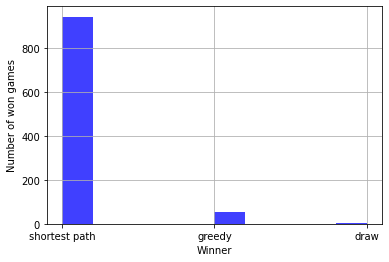

In [87]:
plt.hist(win, density=False, facecolor='b', alpha=0.75)

plt.xlabel('Winner')
plt.ylabel('Number of won games')
plt.grid(True)
plt.show()

In [77]:
win

['greedy',
 'greedy',
 'draw',
 'shortest path',
 'shortest path',
 'greedy',
 'greedy',
 'draw',
 'draw',
 'draw']

In [82]:
data[0]["greedy"]

[{'sender': 6, 'reciever': 5, 'action': None, 'rewards': 0},
 {'sender': 12, 'reciever': 9, 'action': 5, 'rewards': 2.2},
 {'sender': 8, 'reciever': 3, 'action': 9, 'rewards': 5.5},
 {'sender': 4, 'reciever': 3, 'action': 4, 'rewards': 5.51},
 {'sender': 0, 'reciever': 7, 'action': 3, 'rewards': 9.91},
 {'sender': 4, 'reciever': 7, 'action': 4, 'rewards': 9.92},
 {'sender': 10, 'reciever': 11, 'action': 7, 'rewards': 15.42},
 {'sender': 12, 'reciever': 5, 'action': 11, 'rewards': 22.02},
 {'sender': 8, 'reciever': 5, 'action': 8, 'rewards': 22.03},
 {'sender': 0, 'reciever': 8, 'action': 5, 'rewards': 29.730000000000004},
 {'sender': 12, 'reciever': 8, 'action': 12, 'rewards': 29.740000000000006},
 {'sender': 10, 'reciever': 8, 'action': 10, 'rewards': 29.750000000000007},
 {'sender': 12, 'reciever': 3, 'action': 8, 'rewards': 38.55000000000001},
 {'sender': 15, 'reciever': 3, 'action': 15, 'rewards': 38.56000000000001},
 {'sender': 0, 'reciever': 13, 'action': 3, 'rewards': 48.4600000

In [83]:
data[0]['shortest path']

[{'sender': 6, 'reciever': 5, 'action': None, 'rewards': 0},
 {'sender': 12, 'reciever': 9, 'action': 5, 'rewards': 2.2},
 {'sender': 8, 'reciever': 3, 'action': 9, 'rewards': 5.5},
 {'sender': 4, 'reciever': 3, 'action': 4, 'rewards': 5.51},
 {'sender': 0, 'reciever': 7, 'action': 3, 'rewards': 9.91},
 {'sender': 3, 'reciever': 7, 'action': 3, 'rewards': 9.92},
 {'sender': 10, 'reciever': 11, 'action': 7, 'rewards': 15.42},
 {'sender': 12, 'reciever': 5, 'action': 11, 'rewards': 22.02},
 {'sender': 8, 'reciever': 5, 'action': 8, 'rewards': 22.03},
 {'sender': 0, 'reciever': 8, 'action': 5, 'rewards': 29.730000000000004},
 {'sender': 2, 'reciever': 8, 'action': 2, 'rewards': 29.740000000000006},
 {'sender': 6, 'reciever': 8, 'action': 6, 'rewards': 29.750000000000007},
 {'sender': 12, 'reciever': 3, 'action': 8, 'rewards': 38.55000000000001},
 {'sender': 15, 'reciever': 3, 'action': 15, 'rewards': 38.56000000000001},
 {'sender': 0, 'reciever': 13, 'action': 3, 'rewards': 48.46000000000